In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/ML_Capstone_Project/laptop.csv"  # .csv file path
data = pd.read_csv(file_path)

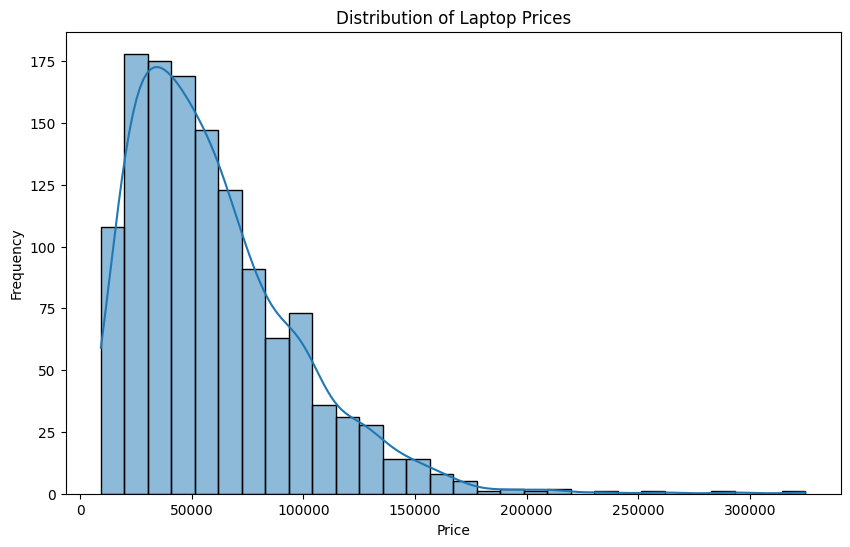

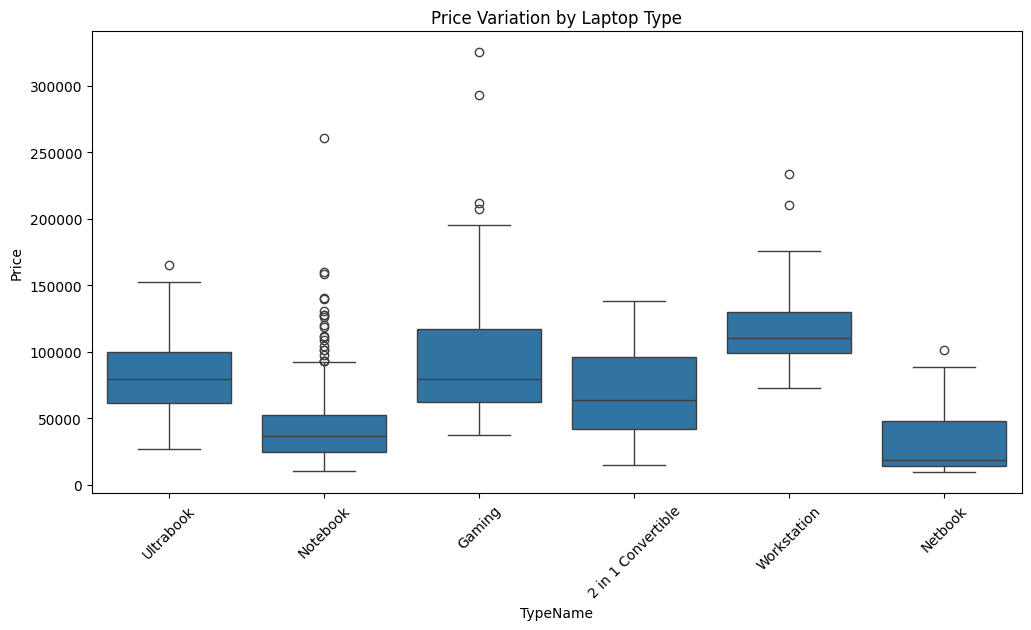

In [4]:
# Visualize trends in laptop prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Identify relationships between features and target
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Price', data=data)
plt.title("Price Variation by Laptop Type")
plt.xticks(rotation=45)
plt.show()

In [5]:
# Data Cleaning
data = data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])  # Drop unnecessary columns
data["Inches"] = pd.to_numeric(data["Inches"], errors="coerce")
data["Weight"] = pd.to_numeric(data["Weight"].str.replace("kg", ""), errors="coerce")
data = data.dropna()  # Drop rows with missing values


In [6]:
# Define features and target
X = data.drop(columns=["Price"])
y = data["Price"]



In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
# Define preprocessing for numerical and categorical features
numerical_features = ["Inches", "Weight"]
categorical_features = ["Company", "TypeName", "ScreenResolution", "Cpu", "Ram", "Memory", "Gpu", "OpSys"]



In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [10]:

# Build the pipeline with Random Forest Regressor
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [11]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Inches', 'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Ram', 'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [12]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [13]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 258998979.5156411
R² Score: 0.8209419156819439


In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_}")


Best Parameters: {'regressor__max_depth': 30, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best R² Score: 0.751259484619602


Top Features by Importance:
                                               Feature  Importance
24                                   TypeName_Notebook    0.285082
1                                               Weight    0.118440
178                                           Ram_16GB    0.090325
0                                               Inches    0.055125
183                                            Ram_4GB    0.049743
182                                           Ram_32GB    0.044402
198                                     Memory_1TB SSD    0.020386
27                           ScreenResolution_1366x768    0.018020
215                                   Memory_512GB SSD    0.017147
32   ScreenResolution_4K Ultra HD / Touchscreen 384...    0.015801


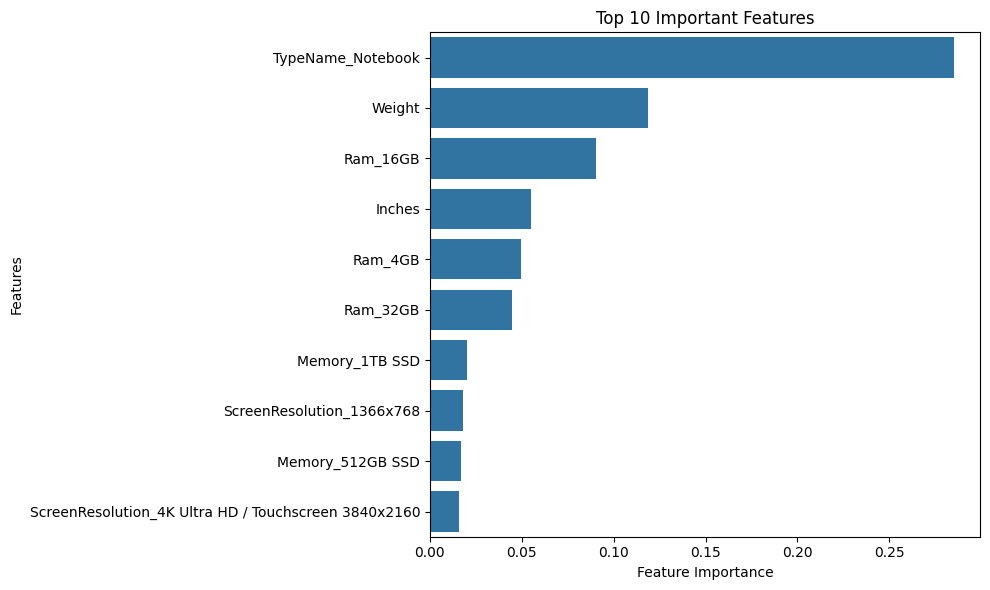

In [15]:
# Extract feature names after preprocessing
numerical_features_transformed = numerical_features
categorical_features_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
all_features = numerical_features_transformed + categorical_features_transformed

# Extract feature importances from the RandomForestRegressor
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': pipeline.named_steps['regressor'].feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print("Top Features by Importance:")
print(feature_importance.head(10))

# Visualize feature importance using barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [16]:
# Save the model for future use
model_path = "/content/drive/MyDrive/Colab Notebooks/ML_Capstone_Project/laptop_price_model.pkl"
joblib.dump(pipeline, model_path)
print(f"Model saved to {model_path}")


Model saved to /content/drive/MyDrive/Colab Notebooks/ML_Capstone_Project/laptop_price_model.pkl
